In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = "../data/u.data"

ratings = pd.read_csv(
    path ,
    sep="\t" ,
    header=None ,
    names=["user_id" , "item_id" , "rating" , "timestamp" ]
)


In [41]:
ratings.head( )

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [42]:
ratings.shape, ratings["user_id"].nunique(), ratings["item_id"].nunique()

((100000, 4), 943, 1682)

In [43]:
R = ratings.pivot_table(
    index="user_id" ,
    columns="item_id" , 
    values="rating" ,
    fill_value = 0
)

R.shape

(943, 1682)

In [44]:
R_np = R.to_numpy()

U, S, Vt = np.linalg.svd( R_np, full_matrices=False )

U.shape, S.shape, Vt.shape



((943, 943), (943,), (943, 1682))

In [49]:
k = 50
U_k = U[:, :k ]
S_k = np.diag(S [:k] )
Vt_k = Vt[:k, : ]

R_hat = U_k @ S_k @ Vt_k  
R_hat.shape

(943, 1682)

In [50]:
energy = (S**2 ) / np.sum(S**2 )
cum_energy = np.cumsum(energy)

cum_energy[9 ], cum_energy[49 ], cum_energy[99 ] 

(np.float64(0.4674707741240898),
 np.float64(0.6112383922570601),
 np.float64(0.715433648676483))

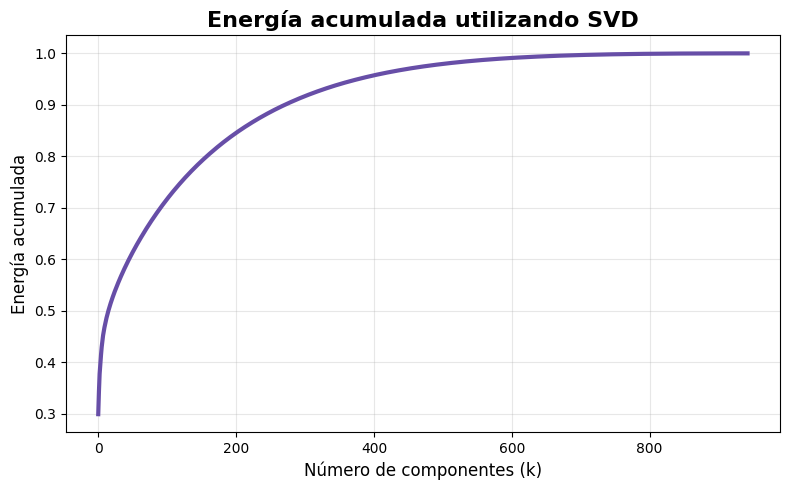

In [52]:


plt.figure(figsize=(8,5))

plt.plot( cum_energy, color="#674EA7", linewidth=3, markersize=6 )

plt.xlabel("Número de componentes (k)", fontsize=12)
plt.ylabel("Energía acumulada", fontsize=12)

plt.title(
    "Energía acumulada utilizando SVD",
    fontsize=16,
    fontweight="bold"
)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()